# Telco Customer Churn – End-to-End Predictive Analytics Project
## Notebook 01: Data Ingestion & Exploratory Data Analysis (EDA)

**Goal of this notebook**  
- Load and understand the raw dataset  
- Spot data quality issues (missing values, wrong data types)  
- Discover which features actually drive churn  
- Create beautiful, recruiter-friendly visualizations that will go straight into my Tableau dashboard and LinkedIn. 


### 1. Import Libraries

In [3]:
import pandas as pd              # Data manipulation
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Beautiful statistical plots
import warnings
warnings.filterwarnings('ignore')  # Hide non-critical warnings for clean output

# Make plots look professional
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

### 2. Load the File

In [5]:
df = pd.read_csv("telco_churn.csv")

print(f"Dataset has {df.shape[0]:,} rows and {df.shape[1]} columns")
df.head()

Dataset has 7,043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Data Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df[df['TotalCharges'].str.strip() == ""][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


## By using the info function, we can see the count of columns and rows, dataType of data, and missing values.  2 columns are of Int datatype and 1 Float datatype and 18 are object Datatype.  There are 7043 rows and 21 columns.  The TotalCharges column Is Float Datatype, but shows Object datatype.

In [10]:
# Before 
print("Before:", df['TotalCharges'].dtype)
# Convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# After 
print("After:", df['TotalCharges'].dtype)

Before: object
After: float64


In [12]:
# Check how many values became missing
print(f"Missing TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")


Missing TotalCharges after conversion: 11


#### Remove and Check Missing Values

In [19]:
# remove missing values
df.dropna(inplace=True)

In [21]:
print(df.isnull().sum().sort_values(ascending=False))

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64


### 4. Churn Distribution (Target Variable)

Churn distribution
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn rate:
Churn
No     0.734
Yes    0.266
Name: proportion, dtype: float64


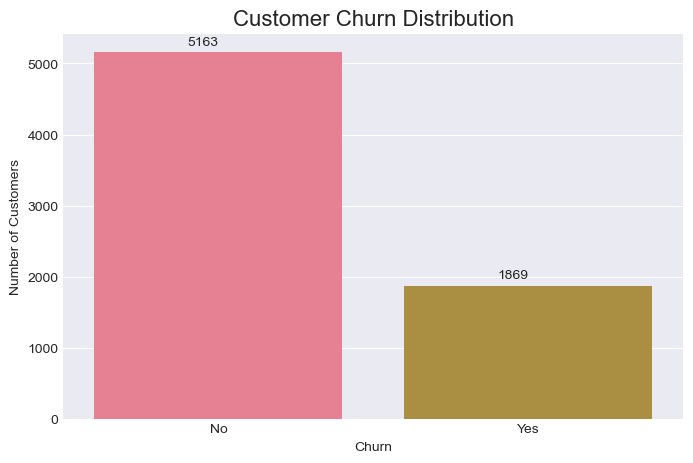

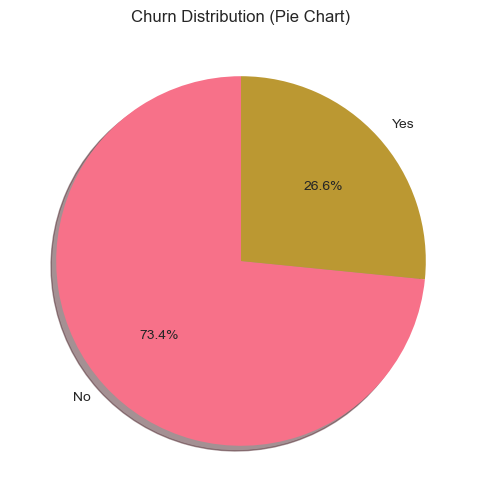

In [29]:
print("Churn distribution")
print(df['Churn'].value_counts())
print("\nChurn rate:")
print(df['Churn'].value_counts(normalize=True).round(3))

# Visual
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Churn', hue='Churn', legend=False)
plt.title('Customer Churn Distribution', size=16)
plt.ylabel('Number of Customers')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.3, p.get_height()+100))
plt.show()

# Count values
churn_counts = df['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',      
    startangle=90,
    shadow=True             
)

plt.title("Churn Distribution (Pie Chart)")
plt.show()

### 5. Numeric Features vs Churn

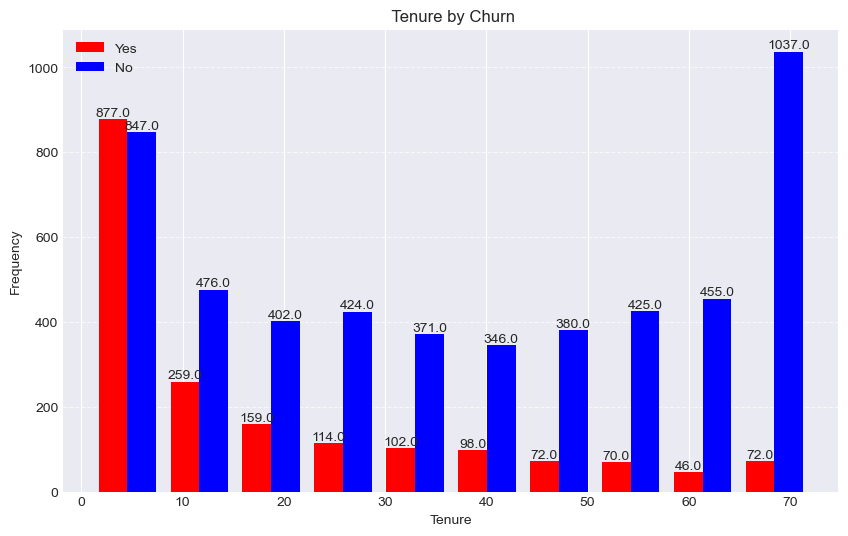

In [38]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

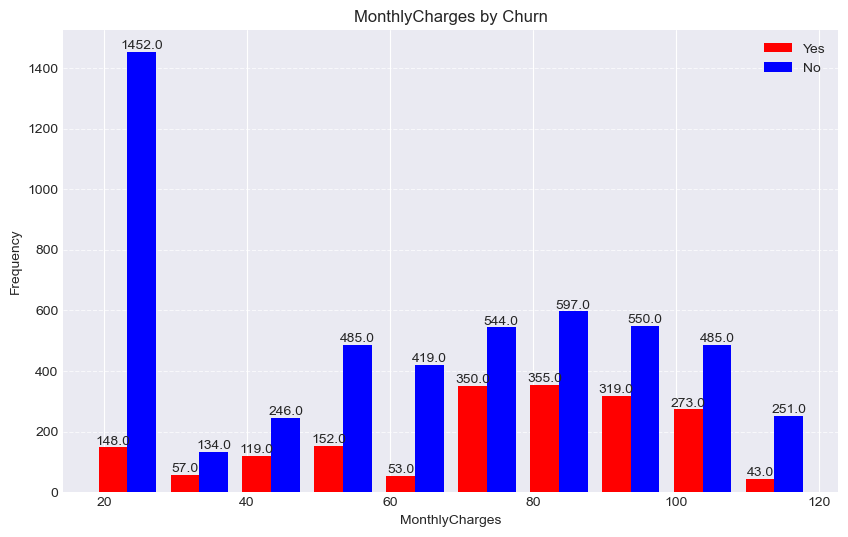

In [40]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

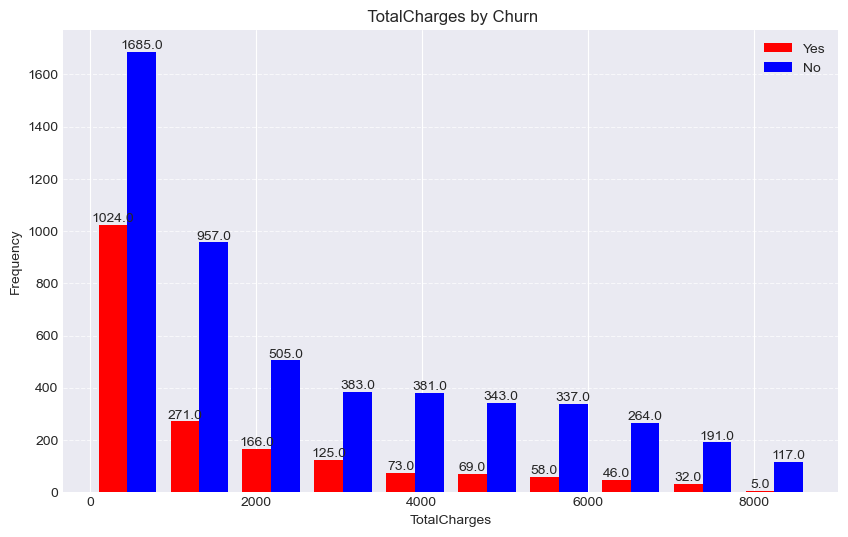

In [42]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

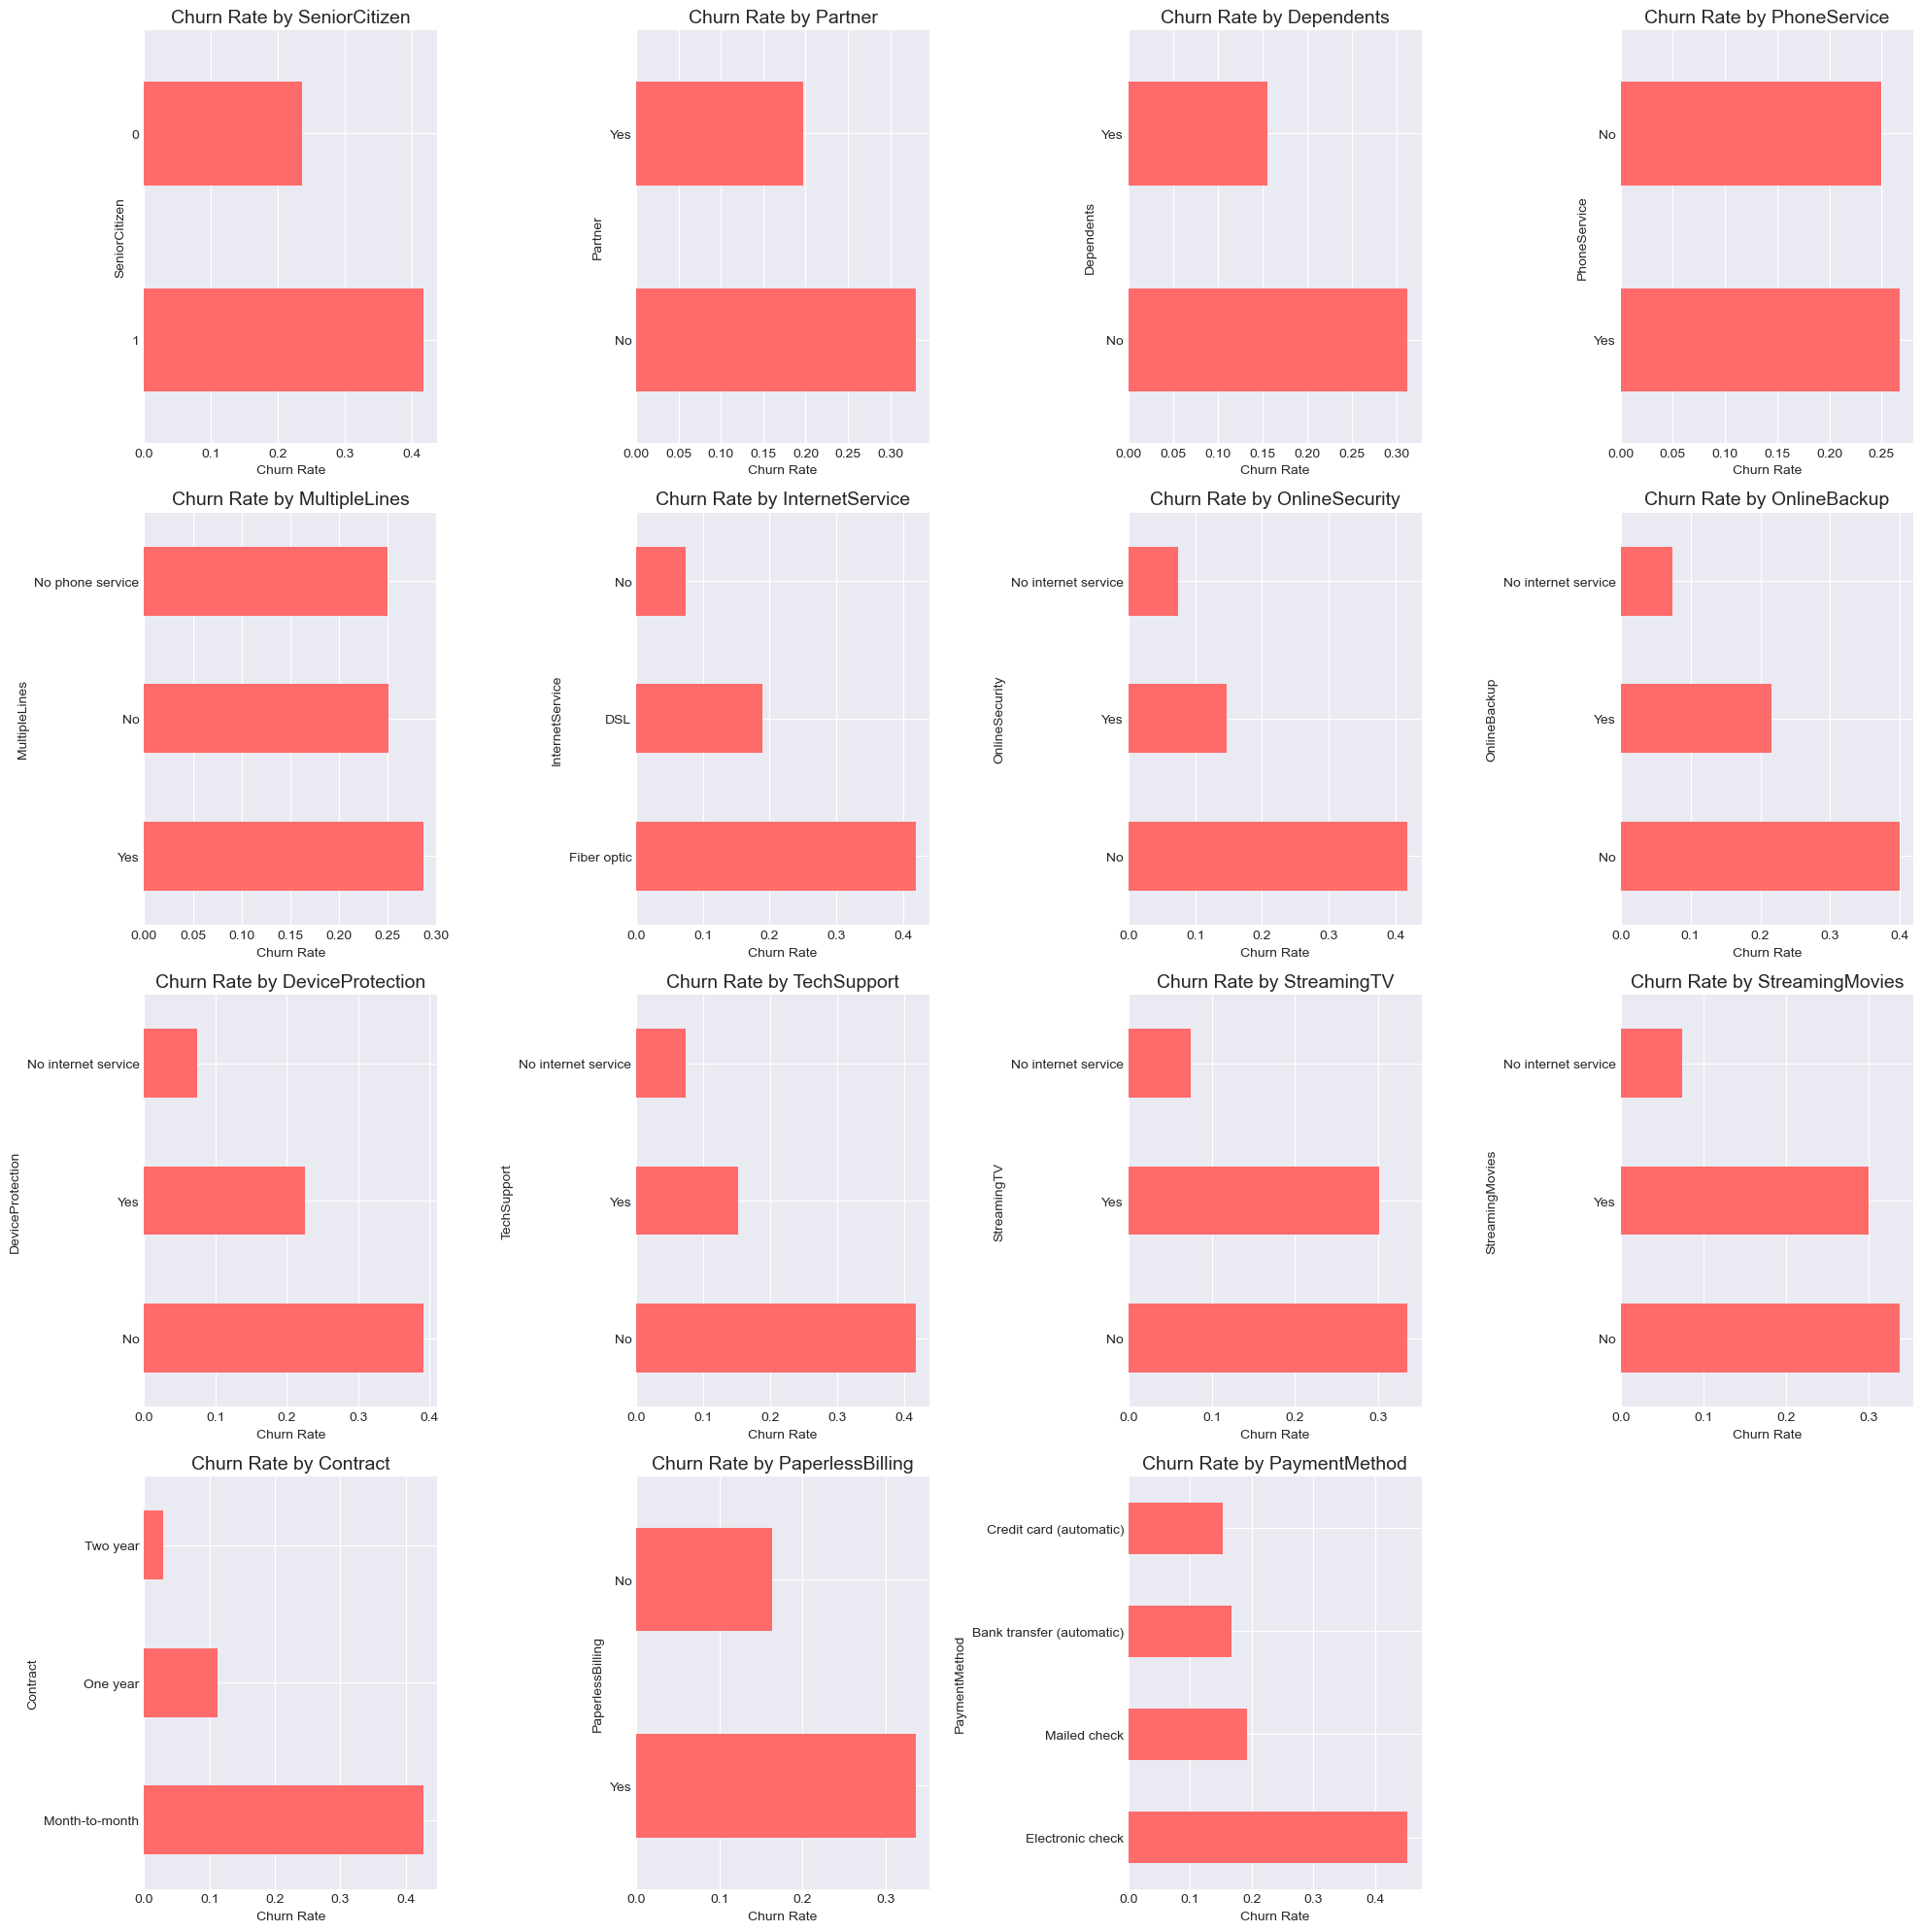

In [44]:
# These are the features that almost always predict churn the strongest
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate churn rate for each category
def churn_rate_plot(col, ax):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    if 'Yes' in churn_rate.columns:
        churn_rate['Yes'].sort_values(ascending=False).plot(kind='barh', ax=ax, color='#ff6b6b')
        ax.set_title(f'Churn Rate by {col}', size=14)
        ax.set_xlabel('Churn Rate')
    else:
        ax.text(0.5, 0.5, 'No Yes churn', horizontalalignment='center', verticalalignment='center')

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(cat_features):
    churn_rate_plot(col, axes[i])

# Hide extra subplots
for j in range(len(cat_features), 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 6. Heatmap

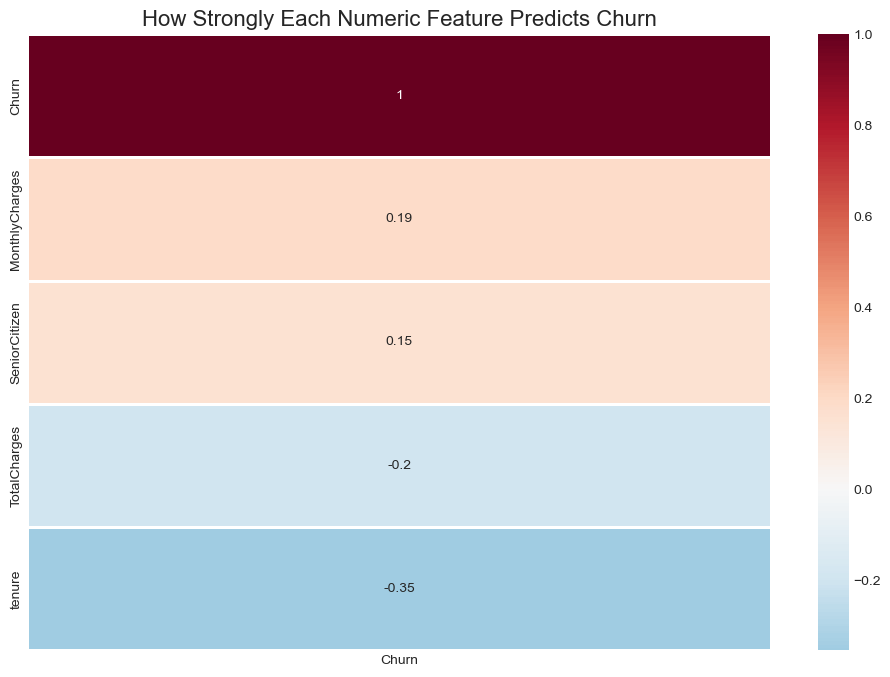

In [47]:
# Encode Churn temporarily just for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
numeric_df = df_corr.select_dtypes(include=['float64', 'int64', 'int32'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr()[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='RdBu_r', center=0, linewidths=1)
plt.title('How Strongly Each Numeric Feature Predicts Churn', size=16)
plt.show()

## 7. Key Business Insights 

1. **Contract type is the #1 driver** – Month-to-month customers churn at ~42% vs <5% for two-year contracts  
2. **Fiber optic internet** has surprisingly high churn – possible service quality issue  
3. Customers without **TechSupport** or **OnlineSecurity** leave at almost double the rate  
4. **Electronic check** payment method is strongly linked to churn  
5. Longer tenure → dramatically lower churn (obvious but important)

→ These insights alone would save a telco millions if acted on.